In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from kneed import KneeLocator

In [2]:
df=pd.read_csv("BKB_WaterQualityData_2020084.csv")

In [3]:
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2241 non-null   float64
 4   Dissolved Oxygen (mg/L)  1520 non-null   float64
 5   pH (standard units)      2276 non-null   float64
 6   Secchi Depth (m)         2298 non-null   float64
 7   Water Depth (m)          2300 non-null   float64
 8   Water Temp (?C)          2250 non-null   float64
 9   Air Temp-Celsius         85 non-null     float64
 10  Air Temp (?F)            2300 non-null   float64
 11  Time (24:00)             2308 non-null   object 
 12  Field_Tech               2332 non-null   object 
 13  DateVerified             453 non-null    object 
 14  WhoVerified             

In [5]:
df.isnull().sum()/len(df)*100

Site_Id                     0.042176
Unit_Id                    98.650358
Read_Date                   0.210881
Salinity (ppt)              5.482919
Dissolved Oxygen (mg/L)    35.892029
pH (standard units)         4.006748
Secchi Depth (m)            3.078870
Water Depth (m)             2.994517
Water Temp (?C)             5.103332
Air Temp-Celsius           96.415015
Air Temp (?F)               2.994517
Time (24:00)                2.657107
Field_Tech                  1.644876
DateVerified               80.894137
WhoVerified                80.894137
AirTemp (C)                 0.000000
Year                        0.000000
dtype: float64

In [6]:
df.drop(["Read_Date","Unit_Id","DateVerified","WhoVerified","Air Temp-Celsius","Site_Id","Field_Tech","Time (24:00)","Year"],axis=1,inplace=True)

In [7]:
df.head()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),AirTemp (C)
0,1.3,11.7,7.3,0.40,0.40,5.9,46.40,8.0
1,1.5,12.0,7.4,0.20,0.35,3.0,36.68,2.6
2,1.0,10.5,7.2,0.25,0.60,5.9,45.68,7.6
3,1.0,10.1,7.4,0.35,0.50,10.0,36.86,2.7
4,1.0,12.6,7.2,0.20,0.40,1.6,32.00,0.0


In [8]:
df["Salinity (ppt)"].unique()

array([1.3 , 1.5 , 1.  , 0.5 , 1.2 , 2.  , 2.3 , 2.5 , 2.25, 2.8 , 3.  ,
        nan, 3.4 , 3.2 , 4.2 , 2.9 , 1.8 , 4.1 , 4.5 , 3.7 , 2.1 , 3.5 ,
       3.8 , 3.9 , 2.4 , 0.7 , 0.4 , 0.9 , 0.  , 2.6 , 9.  , 4.7 , 6.2 ,
       3.3 , 1.4 , 2.2 , 1.6 , 5.  , 4.3 , 5.1 , 4.8 , 5.4 , 1.7 , 4.  ,
       5.5 , 4.4 , 3.1 , 1.9 , 1.1 , 0.1 , 0.2 , 0.3 , 0.08, 0.8 , 0.05,
       0.01, 8.  , 0.09, 0.6 , 0.66, 0.18, 0.24])

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salinity (ppt),2241.0,0.717068,1.230819,0.000000,0.000000,0.000000,1.000000,9.0
Dissolved Oxygen (mg/L),1520.0,6.646263,2.506608,0.000000,4.800000,6.500000,8.500000,15.1
pH (standard units),2276.0,7.168212,0.788485,0.300000,6.500000,7.000000,7.500000,9.9
Secchi Depth (m),2298.0,0.524898,0.473663,0.000000,0.300000,0.400000,0.650000,9.0
Water Depth (m),2300.0,0.762559,0.621140,0.010000,0.400000,0.650000,0.950000,12.0
Water Temp (?C),2250.0,18.062138,8.298246,0.000000,11.000000,19.000000,25.000000,74.0
Air Temp (?F),2300.0,62.051637,15.492236,10.500000,49.000000,63.000000,75.000000,92.3
AirTemp (C),2371.0,15.663050,10.314720,-17.777778,8.888889,16.666667,23.888889,33.5


In [10]:
for i in df:
    df[i].fillna(df[i].mean(), inplace=True)

In [11]:
df.head()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),AirTemp (C)
0,1.3,11.7,7.3,0.40,0.40,5.9,46.40,8.0
1,1.5,12.0,7.4,0.20,0.35,3.0,36.68,2.6
2,1.0,10.5,7.2,0.25,0.60,5.9,45.68,7.6
3,1.0,10.1,7.4,0.35,0.50,10.0,36.86,2.7
4,1.0,12.6,7.2,0.20,0.40,1.6,32.00,0.0


In [12]:
X=df

In [13]:
k_range = range(1,11)
inertias = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(X)
    inertias.append(km.inertia_)
y = np.zeros(len(inertias))
inertias

[974556.3244981421,
 337403.1873084377,
 228896.0023657948,
 160125.91378156995,
 122975.32951453488,
 95648.5456546859,
 83546.84815046971,
 74568.90060834277,
 66168.87506614599,
 60677.37343097052]

([<matplotlib.axis.XTick at 0x277d4349300>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

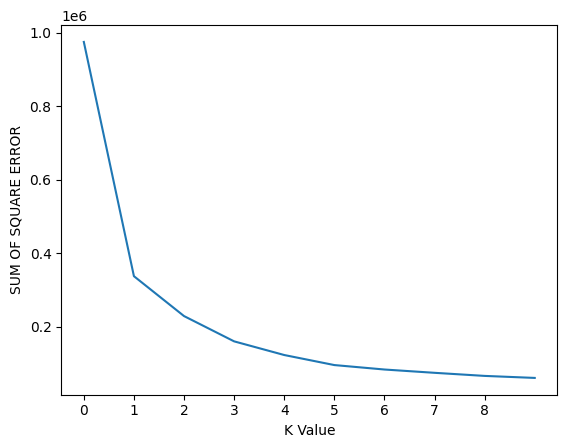

In [14]:
plt.plot(inertias)
plt.xlabel('K Value')
plt.ylabel('SUM OF SQUARE ERROR')
plt.xticks(np.arange(0, 9, 1))

In [15]:
kn = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
elbow_point = kn.knee - 1
elbow_point

2

In [16]:
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(X)
y_predicted

array([1, 1, 1, ..., 1, 0, 1])

In [17]:
df['WaterQuality']=y_predicted
df

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),AirTemp (C),WaterQuality
0,1.3,11.700000,7.3,0.40,0.40,5.9,46.40,8.000000,1
1,1.5,12.000000,7.4,0.20,0.35,3.0,36.68,2.600000,1
2,1.0,10.500000,7.2,0.25,0.60,5.9,45.68,7.600000,1
3,1.0,10.100000,7.4,0.35,0.50,10.0,36.86,2.700000,1
4,1.0,12.600000,7.2,0.20,0.40,1.6,32.00,0.000000,1
...,...,...,...,...,...,...,...,...,...
2366,1.9,5.000000,7.0,4.00,1.20,25.0,78.00,25.555556,0
2367,0.0,9.000000,7.0,0.30,0.60,18.0,58.00,14.444444,1
2368,0.9,2.900000,7.0,0.40,0.90,13.0,49.00,9.444444,1
2369,1.7,6.646263,7.0,0.45,0.90,20.0,65.00,18.333333,0


In [24]:
df.head()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),AirTemp (C),WaterQuality
0,1.3,11.7,7.3,0.40,0.40,5.9,46.40,8.0,1
1,1.5,12.0,7.4,0.20,0.35,3.0,36.68,2.6,1
2,1.0,10.5,7.2,0.25,0.60,5.9,45.68,7.6,1
3,1.0,10.1,7.4,0.35,0.50,10.0,36.86,2.7,1
4,1.0,12.6,7.2,0.20,0.40,1.6,32.00,0.0,1


<AxesSubplot:ylabel='count'>

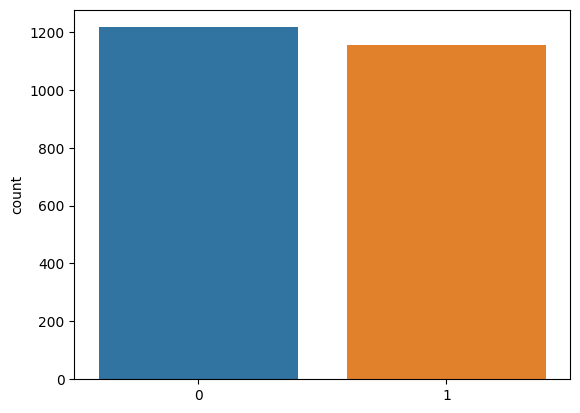

In [19]:
sns.countplot(y_predicted)

<AxesSubplot:xlabel='pH (standard units)', ylabel='Salinity (ppt)'>

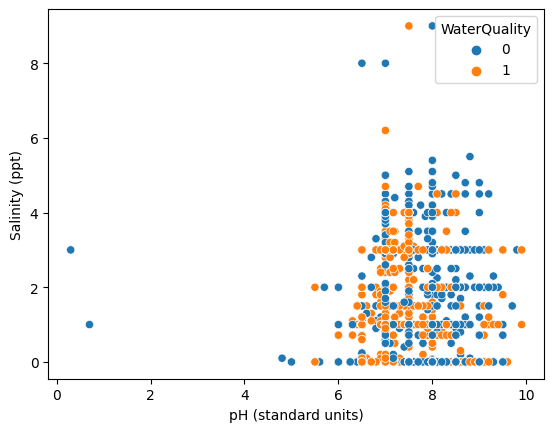

In [20]:
sns.scatterplot(x="pH (standard units)",y="Salinity (ppt)",hue=df["WaterQuality"],data=X)

In [21]:
km.cluster_centers_

array([[ 0.74973242,  5.99265785,  7.29549303,  0.49807742,  0.76092862,
        24.04005024, 74.52768092, 23.6264894 ],
       [ 0.68267901,  7.33438788,  7.0342083 ,  0.55313454,  0.76427486,
        11.76850873, 48.91668415,  7.2790303 ]])

In [22]:
df["WaterQuality"].value_counts()

0    1216
1    1155
Name: WaterQuality, dtype: int64